In [55]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
import joblib
import sasc.config
import numpy as np
from collections import defaultdict
from copy import deepcopy
import pandas as pd
from sasc.modules.fmri_module import convert_module_num_to_voxel_num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
pilot_data_dir = '/home/chansingh/mntv1/deep-fMRI/story_data/20230504'
resp_np_files = os.listdir(pilot_data_dir)
resps_dict = {
    k: np.load(join(pilot_data_dir, k))
    for k in tqdm(resp_np_files)
}

100%|██████████| 6/6 [02:14<00:00, 22.43s/it]


In [20]:
story_mapping = {
    "uts02_pilot_gpt4_mar28___ver=v4_noun___seed=3": 'GenStory2_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v5_noun___seed=4": 'GenStory6_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v5_noun___seed=1": 'GenStory4_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v5_noun___seed=2": 'GenStory5_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v4_noun___seed=4": 'GenStory3_resps.npy',
    "uts02_pilot_gpt4_mar28___ver=v4_noun___seed=1": 'GenStory1_resps.npy',
}

GenStory1_resps.npy (435, 94251)
GenStory2_resps.npy (382, 94251)
GenStory3_resps.npy (322, 94251)
GenStory4_resps.npy (405, 94251)
GenStory5_resps.npy (407, 94251)
GenStory6_resps.npy (470, 94251)


In [63]:
STORIES_DIR = join(sasc.config.RESULTS_DIR, 'pilot_v1')
story_names = story_mapping.keys() # os.listdir(STORIES_DIR)

story_data = defaultdict(list)
for story_name in story_names:
    story_data['timing'].append(pd.read_csv(join(STORIES_DIR, story_name, 'timings_processed.csv')))
    story_data['story_name'].append(story_name)
    print(story_name, story_data['timing'][-1]['time_running'].round(1).max())
    story_data['rows'].append(pd.read_csv(join(STORIES_DIR, story_name, 'rows.csv')))

uts02_pilot_gpt4_mar28___ver=v4_noun___seed=3 784.0
uts02_pilot_gpt4_mar28___ver=v5_noun___seed=4 961.0
uts02_pilot_gpt4_mar28___ver=v5_noun___seed=1 830.2
uts02_pilot_gpt4_mar28___ver=v5_noun___seed=2 834.2
uts02_pilot_gpt4_mar28___ver=v4_noun___seed=4 663.8
uts02_pilot_gpt4_mar28___ver=v4_noun___seed=1 890.3


/tmp/ipykernel_152493/1323719029.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw['voxel_num'] = rw.apply(lambda row: convert_module_num_to_voxel_num(row['module_num'], row['subject']), axis=1)


# look at single story

In [64]:
i = 0 
rows = story_data['rows'][0]
rw = rows[['expl', 'module_num', 'top_explanation_init_strs', 'subject', 'fmri_test_corr', 'top_score_synthetic', 'roi_anat', 'roi_func']]
rw['voxel_num'] = rw.apply(lambda row: convert_module_num_to_voxel_num(row['module_num'], row['subject']), axis=1)
resp = resps_dict[story_mapping[story_data['story_name'][0]]]

/tmp/ipykernel_152493/3635821696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw['voxel_num'] = rw.apply(lambda row: convert_module_num_to_voxel_num(row['module_num'], row['subject']), axis=1)


In [73]:
resp = resp.T # (voxels, time)
resp = resp[rw['voxel_num'].values]

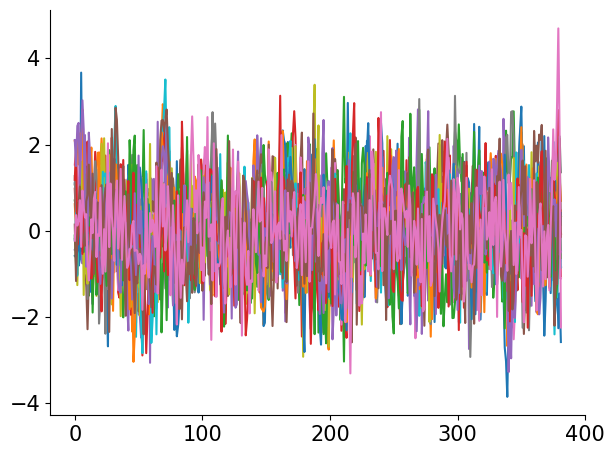

In [76]:
for i in range(resp.shape[0]):
    plt.plot(resp[i])